# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | uglich
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | port-gentil
Processing Record 8 of Set 1 | haapsalu
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | stanytsya luhans'ka
City not found. Skipping...
Processing Record 14 of Set 1 | montrose
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | t

Processing Record 21 of Set 12 | lata
Processing Record 22 of Set 12 | gaspe
Processing Record 23 of Set 12 | dryden
Processing Record 24 of Set 12 | maricopa
Processing Record 25 of Set 12 | kauhava
Processing Record 26 of Set 12 | ulsteinvik
Processing Record 27 of Set 12 | haapsalu
Processing Record 28 of Set 12 | novyy urgal
Processing Record 29 of Set 12 | bazarnyy karabulak
Processing Record 30 of Set 12 | lobujya
Processing Record 31 of Set 12 | banda aceh
Processing Record 32 of Set 12 | tanout
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,10.39,50,89,2.10,CL,1698669041
1,ust-nera,64.5667,143.2000,-16.73,97,74,1.06,RU,1698669087
2,college,64.8569,-147.8028,-3.03,86,75,0.00,US,1698669010
3,port-aux-francais,-49.3500,70.2167,2.47,64,71,14.37,TF,1698669019
4,uglich,57.5275,38.3317,-1.55,95,100,4.05,RU,1698669458


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,10.39,50,89,2.10,CL,1698669041
1,ust-nera,64.5667,143.2000,-16.73,97,74,1.06,RU,1698669087
2,college,64.8569,-147.8028,-3.03,86,75,0.00,US,1698669010
3,port-aux-francais,-49.3500,70.2167,2.47,64,71,14.37,TF,1698669019
4,uglich,57.5275,38.3317,-1.55,95,100,4.05,RU,1698669458


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

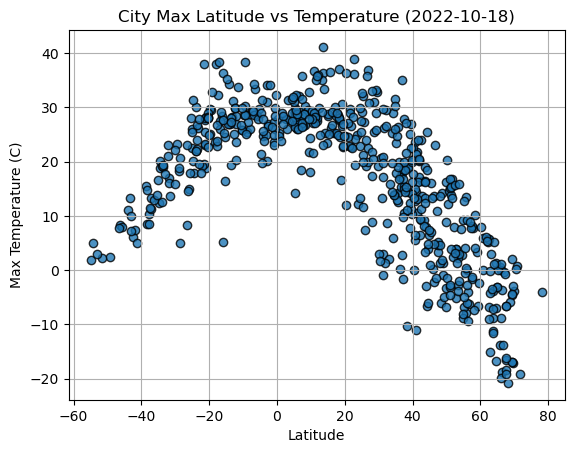

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

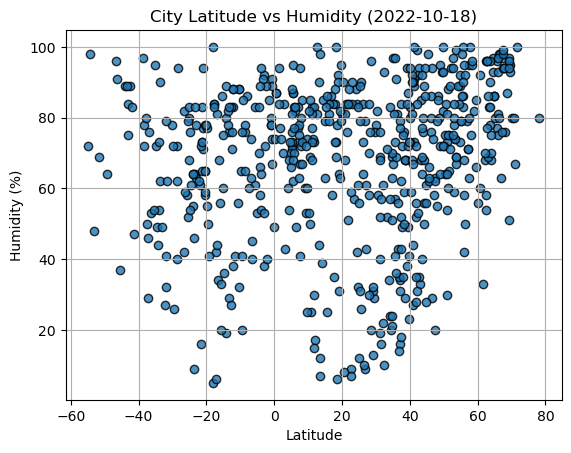

In [9]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

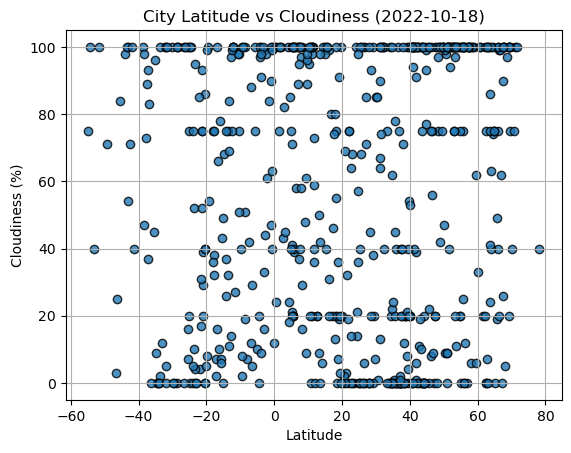

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

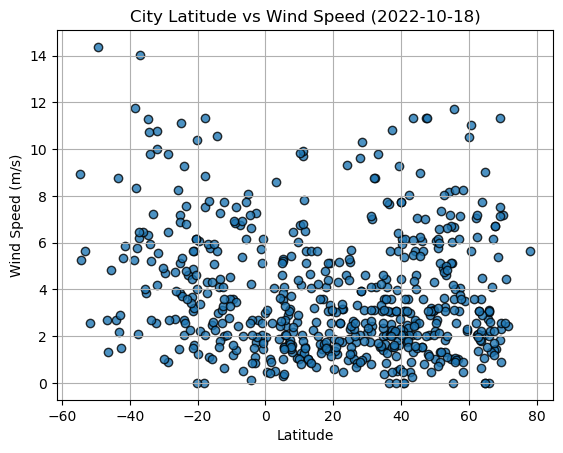

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def create_linear_regression(x_values, y_values, xlabel, ylabel, title, xline, yline):
    # Calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create a scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

    # Plot the regression line and linear equation
    plt.plot(x_values, regress_values, color="red")
    plt.annotate(line_eq,(xline,yline),fontsize=15,color="red")

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the correlation coefficient on the plot
    print(f"The r-value is: {rvalue**2}")

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5667,143.2000,-16.73,97,74,1.06,RU,1698669087
2,college,64.8569,-147.8028,-3.03,86,75,0.00,US,1698669010
4,uglich,57.5275,38.3317,-1.55,95,100,4.05,RU,1698669458
5,tura,25.5198,90.2201,21.29,90,100,1.29,IN,1698669094
7,haapsalu,58.9431,23.5414,3.32,82,100,3.50,EE,1698669459


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,10.39,50,89,2.10,CL,1698669041
3,port-aux-francais,-49.3500,70.2167,2.47,64,71,14.37,TF,1698669019
6,port-gentil,-0.7193,8.7815,29.98,74,40,6.17,GA,1698669459
10,edinburgh of the seven seas,-37.0676,-12.3116,11.31,76,83,14.02,SH,1698669015
11,adamstown,-25.0660,-130.1015,22.45,80,100,3.84,PN,1698669019


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6934449051605682


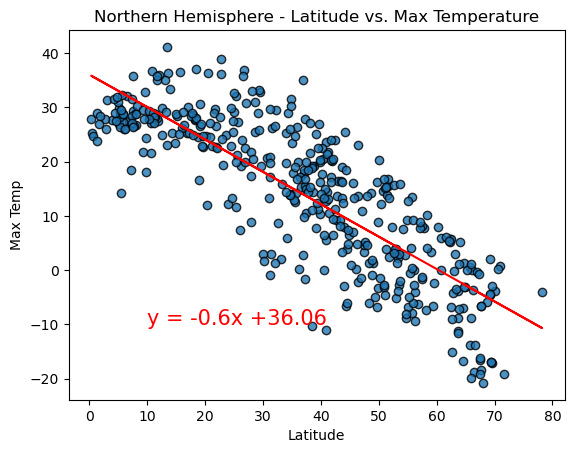

In [15]:
# Linear regression on Northern Hemisphere

create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Northern Hemisphere - Latitude vs. Max Temperature",10,-10)


The r-value is: 0.5892393719553173


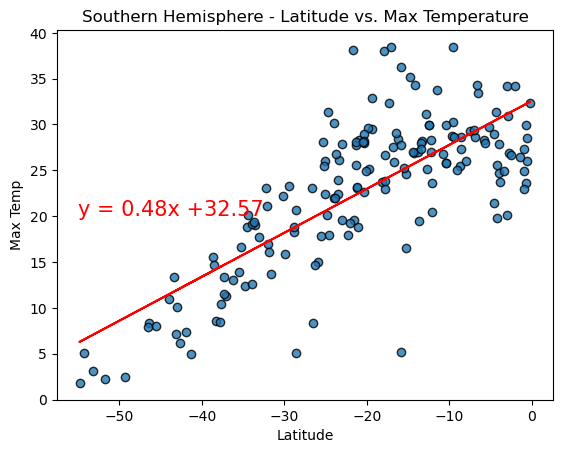

In [16]:
# Linear regression on Southern Hemisphere

create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Southern Hemisphere - Latitude vs. Max Temperature",-55,20)

**Discussion about the linear relationship:** The linear regression model for Temperature vs Latitude in the Northern Hemisphere has a negative slope close to 1, indicating a strong positive linear relationship. This aligns with the strong correlation coefficient between these two variables.

In the case of the linear regression model for Temperature vs Latitude in the Southern Hemisphere, the positive slope is less than 1, suggesting a moderate linear relationship. This observation is in line with the moderate correlation coefficient between these variables. It's worth noting that the quantity of data available for the Southern Hemisphere is limited compared to the Northern Hemisphere, which could be influencing both the correlation and the slope of the linear model. Additionally, some outliers could affect the correlation too.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.044977815123156274


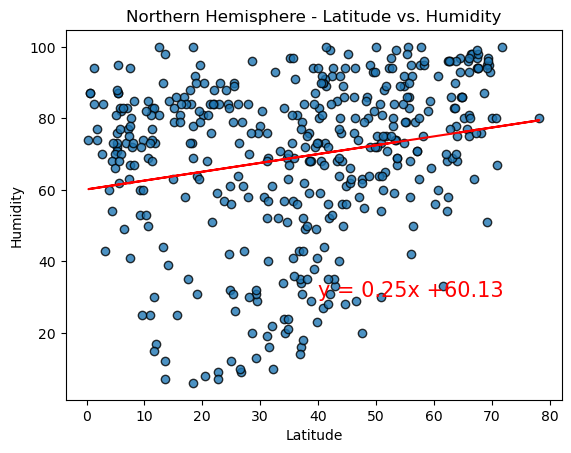

In [17]:
# Northern Hemisphere

create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere - Latitude vs. Humidity",40,30)

The r-value is: 5.226184444593486e-05


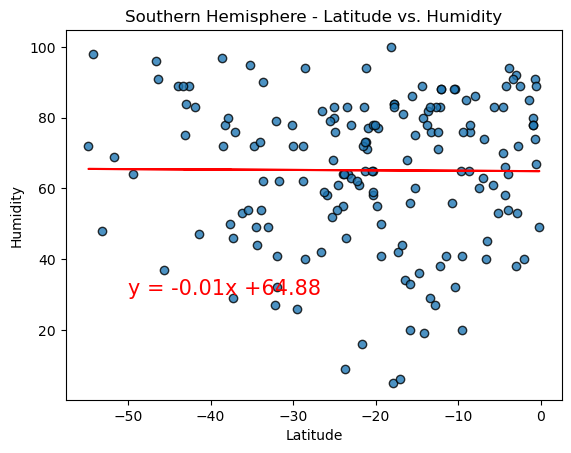

In [18]:
# Southern Hemisphere

create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere - Latitude vs. Humidity",-50,30)

**Discussion about the linear relationship:** Both the Northern Hemisphere and Southern Hemisphere linear regression models show a slope significantly less than 1. This suggests a weak linear relationship between the variables Humidity and Latitude. This aligns with the very weak coefficient of correlation present in both databases. Additionally, some outliers could affect the correlation too for both dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007742215433377339


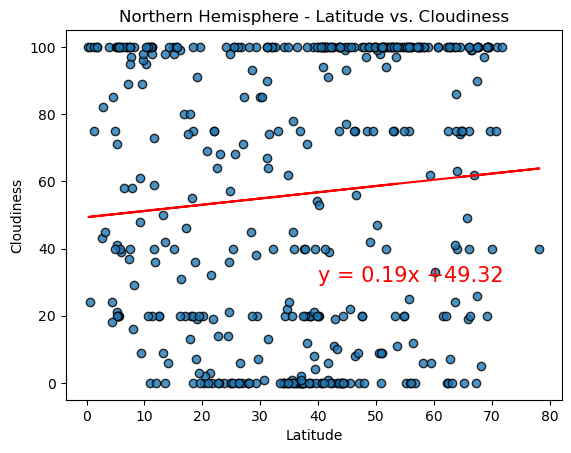

In [19]:
# Northern Hemisphere

create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere - Latitude vs. Cloudiness",40,30)

The r-value is: 1.7691800899357436e-06


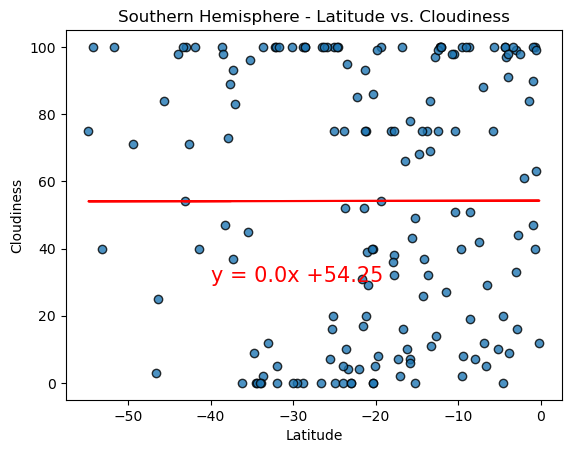

In [20]:
# Southern Hemisphere

create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere - Latitude vs. Cloudiness",-40,30)

**Discussion about the linear relationship:** Both the Northern Hemisphere and Southern Hemisphere linear regression models show a slope significantly less than 1. This suggests a weak linear relationship between the variables Cloudiness and Latitude. This aligns with the no correlation present in both databases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016045077192468213


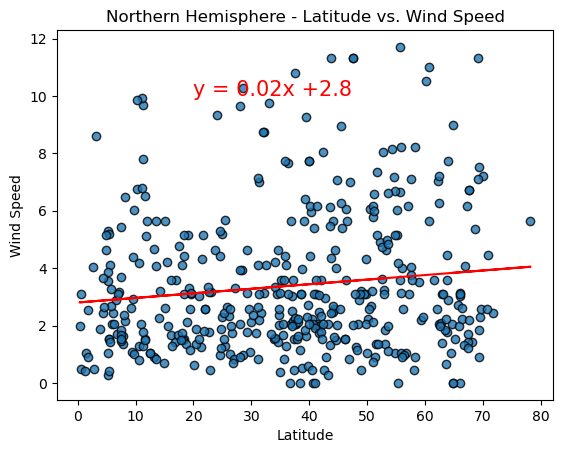

In [21]:
# Northern Hemisphere

create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - Latitude vs. Wind Speed",20,10)

The r-value is: 0.08639546820835331


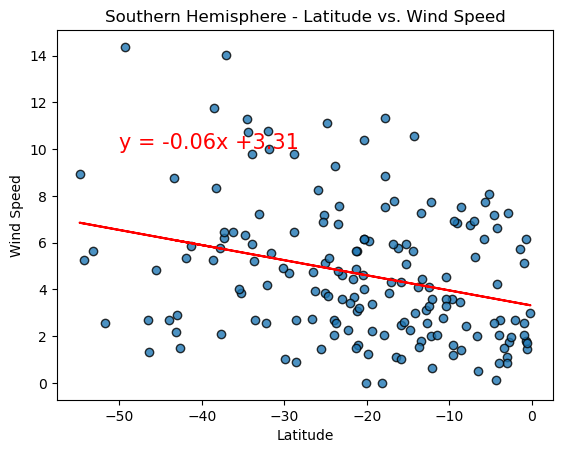

In [22]:
# Southern Hemisphere

create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere - Latitude vs. Wind Speed",-50,10)

**Discussion about the linear relationship:** Both the Northern Hemisphere and Southern Hemisphere linear regression models show a slope significantly less than 1. This suggests a weak linear relationship between the variables Wind Speed and Latitude. This aligns with the very weak coefficient of correlation present in both databases. Additionally, some outliers could affect the correlation and linear relationship too for both dataset.